# Rental Demand Predictions

# Data Exploration


In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline
plt.rcParams["figure.figsize"] = [8,5]

C:\Users\somna\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
rental_df = pd.read_csv('day.csv')
rental_analysis = rental_df.copy() #saving a copy for analysis and adding multiple features

In [3]:
rental_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [4]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
rental_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
rental_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
rental_df.drop('instant',axis = 1,inplace = True) #dropping the unique variable

# Data Visualizations

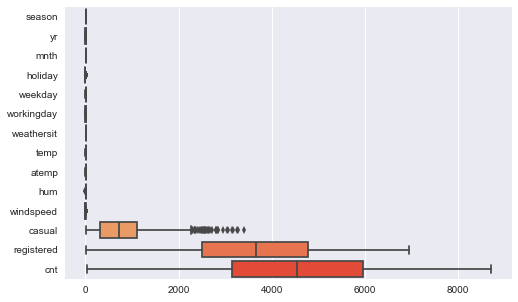

In [8]:
sns.boxplot(data=rental_df,palette='rainbow',orient='h') #plotting outliers

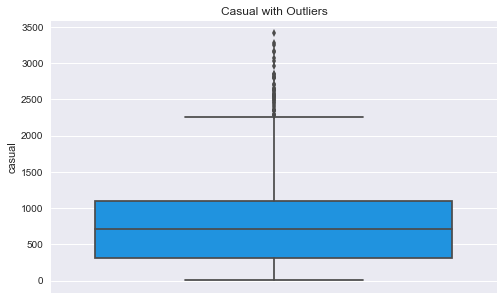

In [9]:
sns.boxplot(rental_df['casual'],orient= 'v',color = '#0099ff').set_title('Casual with Outliers')

In [10]:
rental_df['casual'].describe() #distribution of the casual variable

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: casual, dtype: float64

In [11]:
percentiles = rental_df['casual'].quantile([0.05,0.95]).values #calculating the 5th and 95th quartile
rental_df['casual'][rental_df["casual"] >= percentiles[1]] = percentiles[1] #replacing values above upper whiskers with 95th %

C:\Users\somna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


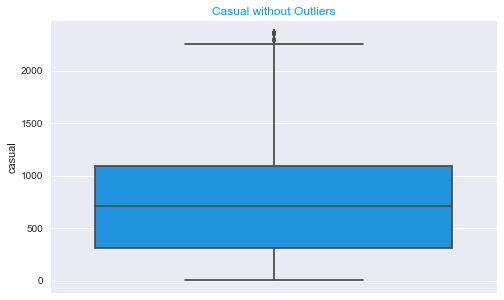

In [12]:
sns.boxplot(rental_df['casual'],orient= 'v',color = '#0099ff').set_title('Casual without Outliers',color = '#0099ff')

# Feature Engineering

In [13]:
rental_analysis['raw_temp'] = (rental_analysis['temp'] * 47) + (-8) #de-normalizing the temperature
rental_analysis['raw_atmep'] = (rental_analysis['atemp'] * 66) + (-16) #de-normalizing the absolute temperature
rental_analysis['raw_wind'] = rental_analysis['windspeed'] * 67 #de-normalizing the windspeed
rental_analysis['raw_humidity'] = rental_analysis['hum'] * 100 #de-normalizing the humidity

In [14]:
rental_analysis['season'] = rental_analysis['season'].astype('category') 
rental_analysis['yr'] = rental_analysis['yr'].astype('category') #converting Continuos to categorical for visualizations
rental_analysis['mnth'] = rental_analysis['mnth'].astype('category')
rental_analysis['weekday'] = rental_analysis['weekday'].astype('category')
rental_analysis['weathersit'] = rental_analysis['weathersit'].astype('category')

In [15]:
rental_analysis.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,raw_temp,raw_atmep,raw_wind,raw_humidity
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849,7.999250,10.749882,80.5833
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466,7.346774,16.652113,69.6087
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108,-3.499270,16.636703,43.7273
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000,-1.999948,10.739832,59.0435
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979,-0.868180,12.522300,43.6957


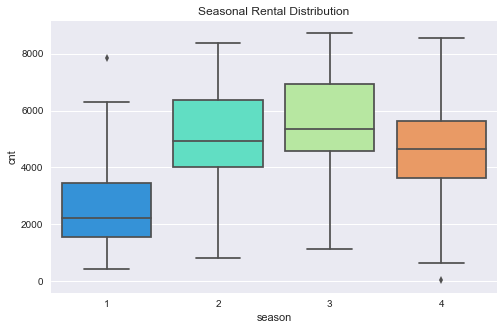

In [17]:
#Seasonal Rental Distribution
sns.boxplot(x = 'season', y = 'cnt', data = rental_analysis,palette='rainbow' ).set_title('Seasonal Rental Distribution')

Conclusion:     Season 1 (Springer) - The average rentals is about 2100
                Season 2 (Summer) - The average rentals is about 4400
                Season 3 (Fall) - The average rentals is about 4500
                Weather 4 (Winter) - The average rentals is about 4300

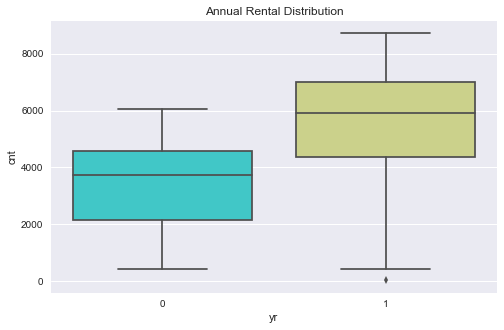

In [18]:
#Annual Rental Distribution
sns.boxplot(x = 'yr', y = 'cnt', data = rental_analysis,palette='rainbow' ).set_title('Annual Rental Distribution')

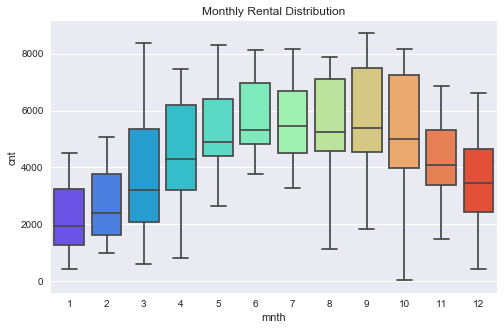

In [19]:
#MOnthly Rental Distribution
sns.boxplot(x = 'mnth', y = 'cnt', data = rental_analysis,palette='rainbow' ).set_title('Monthly Rental Distribution')

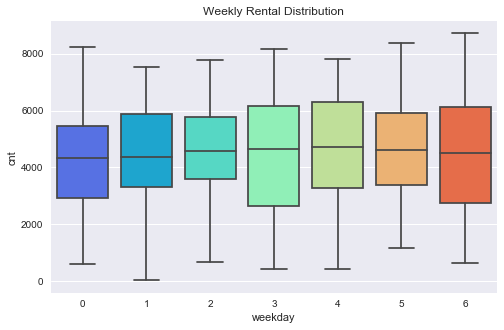

In [20]:
#Weekly Rental Distribution
sns.boxplot(x = 'weekday', y = 'cnt', data = rental_analysis,palette='rainbow' ).set_title('Weekly Rental Distribution')

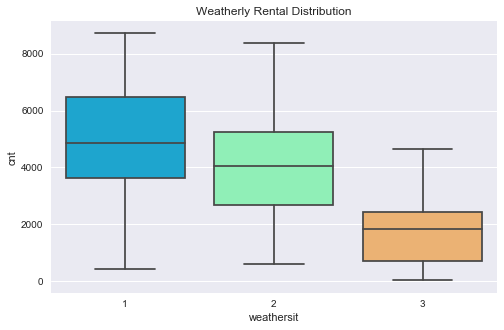

In [21]:
#Weather Rental Distribution
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental_analysis,palette='rainbow' ).set_title('Weatherly Rental Distribution')

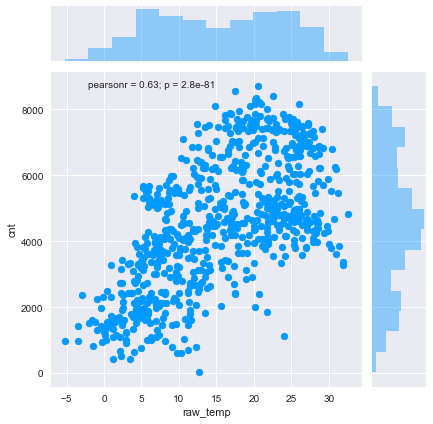

In [22]:
#Temp V/s Rental Count 
sns.jointplot(x='raw_temp',y='cnt',data=rental_analysis,kind='scatter',color = '#0099ff')

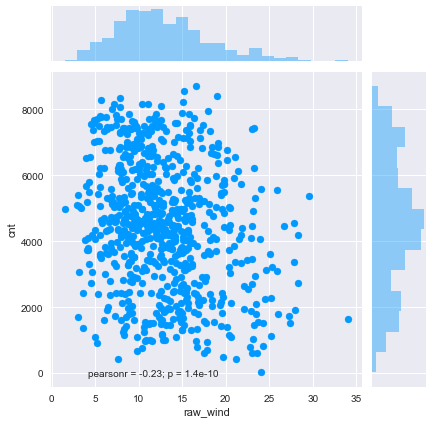

In [23]:
#Wind V/s Rental Count
sns.jointplot(x='raw_wind',y='cnt',data=rental_analysis,kind='scatter',color = '#0099ff')

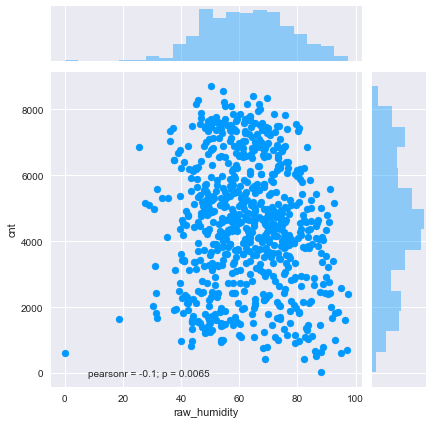

In [24]:
#Humidity V/s Rentals Plot
sns.jointplot(x='raw_humidity',y='cnt',data=rental_analysis,kind='scatter',color = '#0099ff')

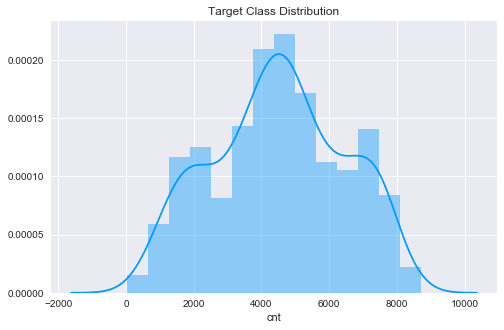

In [25]:
#Target Variable Distribution
sns.distplot(rental_df['cnt'],color = '#0099ff').set_title('Target Class Distribution') 

In [26]:
corr_ = rental_df.corr() #correlation matrix

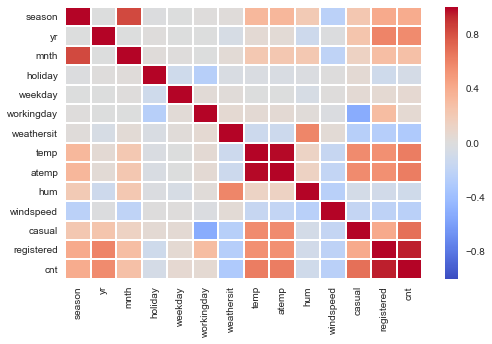

In [27]:
sns.heatmap(corr_,cmap='coolwarm',linecolor='white', linewidths=1) #correlation plot

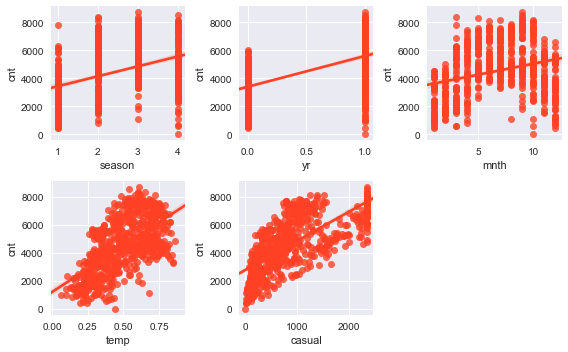

In [28]:
l = ['season','yr','mnth','temp','casual'] #regression plots for highly correlated features with response variable
for i in range(0,5):
    plt.subplot(2,3,i+1)
    target_plot = sns.regplot(x = l[i], y ='cnt' , data = rental_df,color = '#ff4125')
    plt.tight_layout()

# Model Development


i) Linear Regression


In [29]:
X = rental_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed',]]
y = rental_df['cnt']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
predictions = lm.predict(X_test)

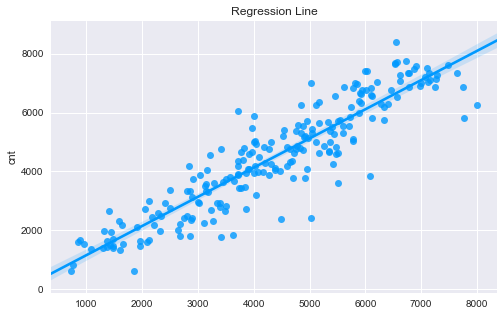

In [34]:
sns.regplot(predictions,y_test,color = '#0099ff').set_title('Regression Line')

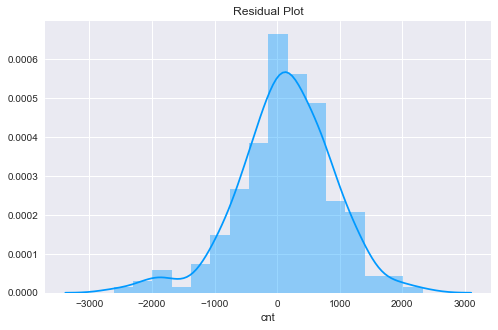

In [35]:
sns.distplot((y_test - predictions), color= '#0099ff' ).set_title('Residual Plot') #Residual Plot

Model Validation

In [36]:
MSE = metrics.mean_squared_error(y_test,predictions)
MAE = metrics.mean_absolute_error(y_test,predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))

In [37]:
print('The Mean Squared Error is: {}'.format(MSE))
print('The Mean Absolute Error is: {}'.format(MAE))
print('The Root Mean Squared Error is: {}'.format(RMSE))

The Mean Squared Error is: 591297.4006284553
The Mean Absolute Error is: 586.1872170370991
The Root Mean Squared Error is: 768.9586468910115


In [38]:
np.corrcoef(predictions,y_test) #Correlation of predicted and actual values #Accuracy: 91.32%

array([[ 1.        ,  0.91322497],
       [ 0.91322497,  1.        ]])

In [39]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2078.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:49:52   Log-Likelihood:                -6008.0
No. Observations:                 731   AIC:                         1.204e+04
Df Residuals:                     721   BIC:                         1.208e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       564.1565     56.228     10.033      0.000     453.767     674.546
yr          2141.3265     65.922     32.483      0.000    2011.904    2270.749
mnth         -42.2544     17.689     -2.389      0.017     -76.983      -7.526
holiday     -376.8411    206.828     -1.822      0.069    -782.899      29.217
weekday       96.1054     16.328      5.886      0.000      64.050     128.161
workingday   222.1273     73.072      3.040      0.002      78.667     365.588
weathersit  -672.2441     80.700     -8.330      0.000    -830.680    -513.809
temp        5497.8546    195.135     28.175      0.000    5114.753    5880.956
hum          336.5494    262.795      1.281      0.201    -179.386     852.485
windspeed   -833.7593    374.199     -2.228      0.026   -1568.410     -99.109
==============================================================================
Omnibus:                      100.041   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.845
Skew:                          -0.780   Prob(JB):                     9.96e-47
Kurtosis:                       5.126   Cond. No.                         95.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ii) Decision Tree Regression

In [40]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)


In [41]:
regr_1.fit(X, y)#fitting the models
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [42]:
# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [43]:
dtr_1 = np.corrcoef(y_1,y_test)  # Accuracy: 84.34%
dtr_2 = np.corrcoef(y_2,y_test) #Accuracy: 95.18% 

In [44]:
print("The accuracy for depth 2 is {}".format(dtr_1[0][1] *100))
print("The accuracy for depth 3 is {}".format(dtr_2[0][1] *100))

The accuracy for depth 2 is 84.3459746738674
The accuracy for depth 3 is 92.39007230797486


Model Validation

In [45]:
dt_MSE = metrics.mean_squared_error(y_1,predictions)
dt_MAE = metrics.mean_absolute_error(y_1,predictions)
dt_RMSE = np.sqrt(metrics.mean_squared_error(y_1,predictions))

In [46]:
print('The Mean Squared Error is: {}'.format(dt_MSE))
print('The Mean Absolute Error is: {}'.format(dt_MAE))
print('The Root Mean Squared Error is: {}'.format(dt_RMSE))

The Mean Squared Error is: 968358.6752043474
The Mean Absolute Error is: 811.7394858435366
The Root Mean Squared Error is: 984.0521709768987


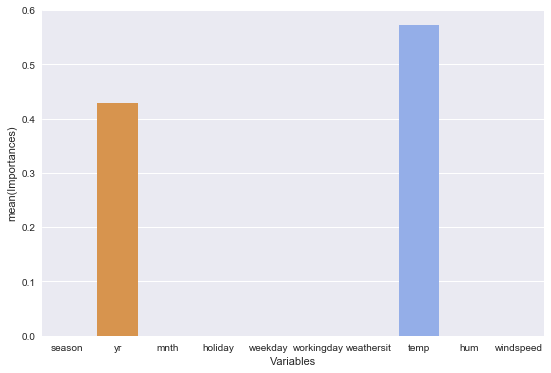

In [47]:
cdf = pd.DataFrame(regr_1.feature_importances_,X.columns).reset_index()
cdf.rename(columns={'index':'Variables',0: 'Importances'},inplace = True)
plt.figure(figsize=(9,6))
sns.barplot(x = 'Variables', y = 'Importances',data = cdf)

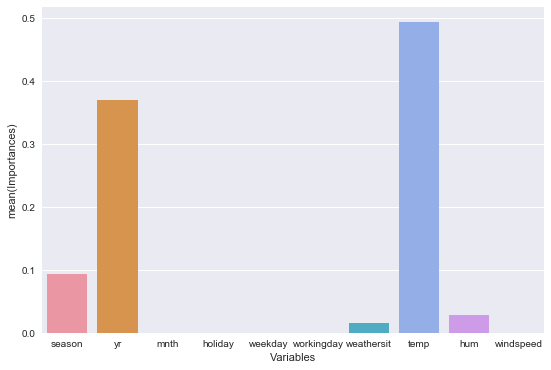

In [48]:
cdf_2 = pd.DataFrame(regr_2.feature_importances_,X.columns).reset_index()
cdf_2.rename(columns={'index':'Variables',0: 'Importances'},inplace = True)
plt.figure(figsize=(9,6))
sns.barplot(x = 'Variables', y = 'Importances',data = cdf_2)

iii) Random Forest Regressor

In [49]:
regr_3 = RandomForestRegressor(max_depth=2, random_state=0)
regr_4 = RandomForestRegressor(max_depth=3, random_state=0)

In [50]:
regr_3.fit(X, y)
regr_4.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
rfr_pred_1 = regr_3.predict(X_test)
rfr_pred_2 = regr_4.predict(X_test)

The accuracy for depth 2 is 87.83699574665015


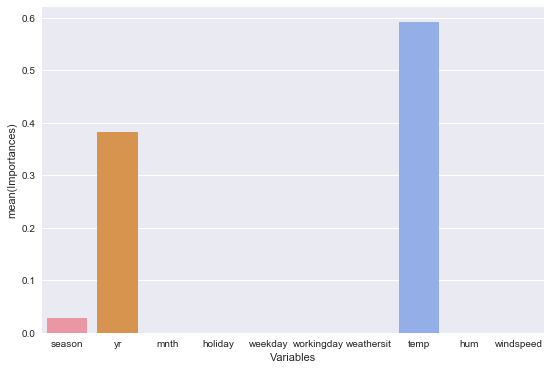

In [52]:
cdf_3 = pd.DataFrame(regr_3.feature_importances_,X.columns).reset_index() #dataframe for actual and predicted values
cdf_3.rename(columns={'index':'Variables',0: 'Importances'},inplace = True) #renaming the variables
plt.figure(figsize=(9,6)) #setting the plot size
sns.barplot(x = 'Variables', y = 'Importances',data = cdf_3) #barplot for feature independence
rfr_acc1 = np.corrcoef(rfr_pred_1,y_test) #correlation between the actual and predicted values
print("The accuracy for depth 2 is {}".format(rfr_acc1[0][1] *100))

The accuracy for depth 3 Random Forest Regressor is 93.17484667693155


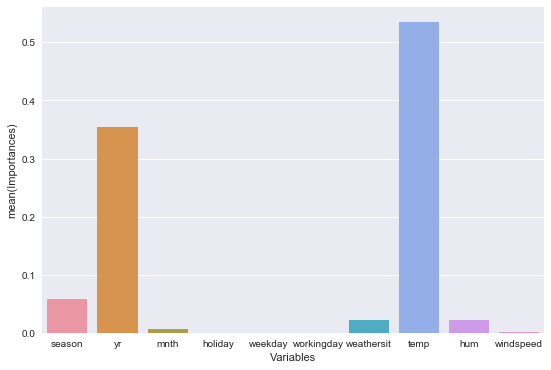

In [53]:
cdf_4 = pd.DataFrame(regr_4.feature_importances_,X.columns).reset_index()
cdf_4.rename(columns={'index':'Variables',0: 'Importances'},inplace = True)
plt.figure(figsize=(9,6))
sns.barplot(x = 'Variables', y = 'Importances',data = cdf_4)
rfr_acc2 = np.corrcoef(rfr_pred_2,y_test)
print("The accuracy for depth 3 Random Forest Regressor is {}".format(rfr_acc2[0][1] *100))

# Conclusion


We can use the Random Forest Regressor as our Final Model for better accuracy. Random Forest Regressor had an accuracy of 93.17% with the important variables as Temperature, Year, Season, and Weathersit.
Other Models accuracies:
Linear Model : 91.32%
Decision Tree Regressor: 84.18% depth = 2 and 92.39% depth = 3
Random Forest Regressor: 87.83% depth = 2 and 93.17% depth = 3